In [5]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [4]:
!pip install wordcloud

In [6]:
df = pd.read_csv("Customers.csv")

In [7]:
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [8]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [10]:
df.shape

(2000, 8)

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [17]:
data = df.isnull().sum()

In [18]:
data

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

(array([ 52.,  50., 127., 289., 296., 239., 237., 253., 222., 235.]),
 array([     0. ,  18997.4,  37994.8,  56992.2,  75989.6,  94987. ,
        113984.4, 132981.8, 151979.2, 170976.6, 189974. ]),
 <BarContainer object of 10 artists>)

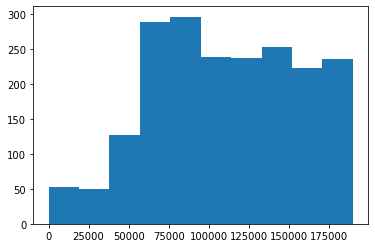

In [21]:
plt.hist(df["Annual Income ($)"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

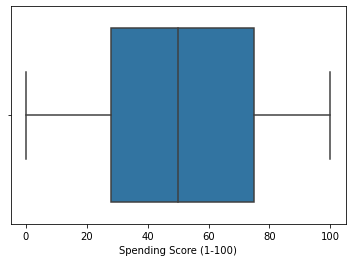

In [22]:
sns.boxplot(df['Spending Score (1-100)'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Experience'>

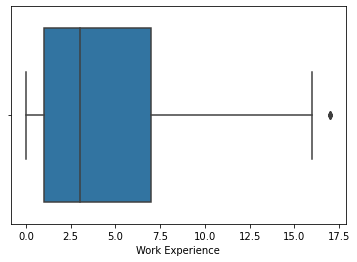

In [23]:
sns.boxplot(df['Work Experience'])

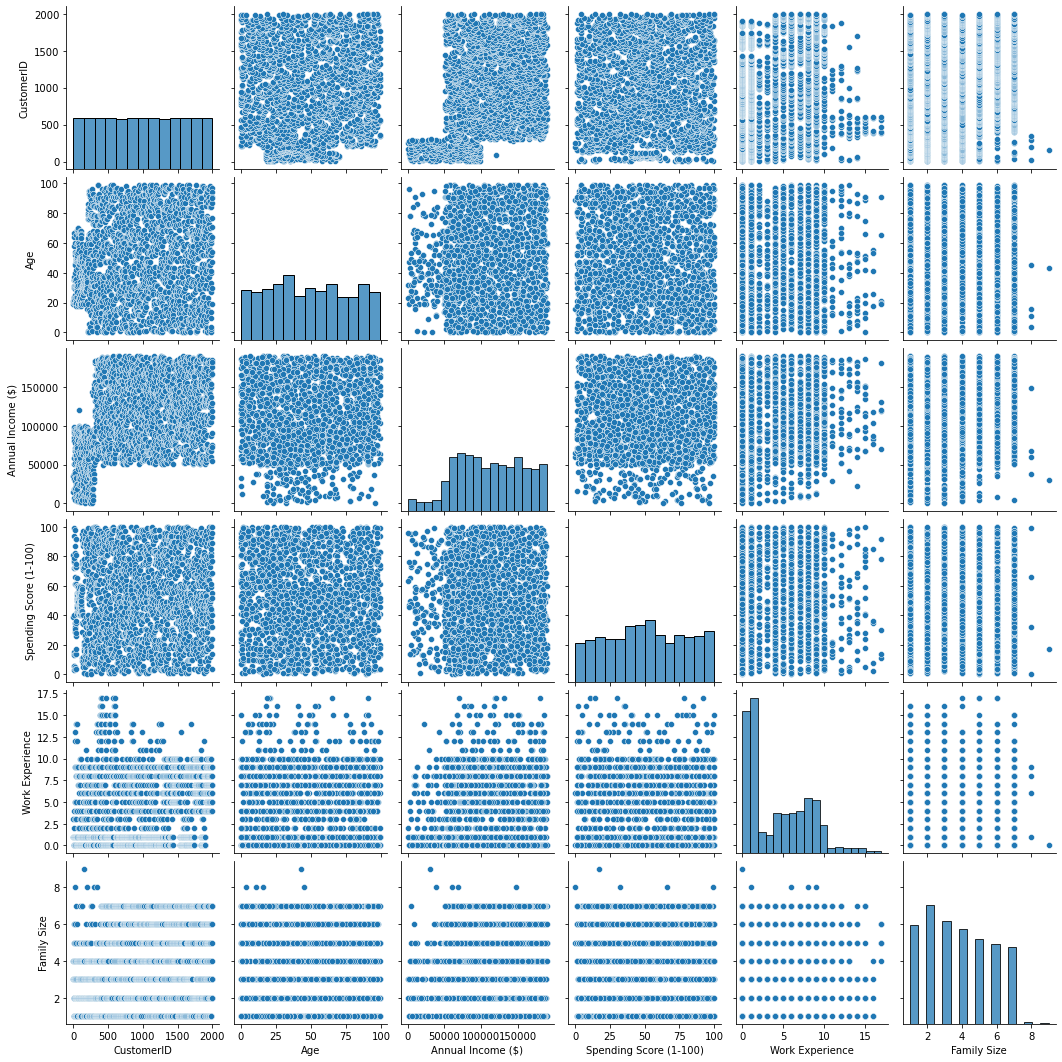

In [24]:
sns.pairplot(df)

<AxesSubplot:>

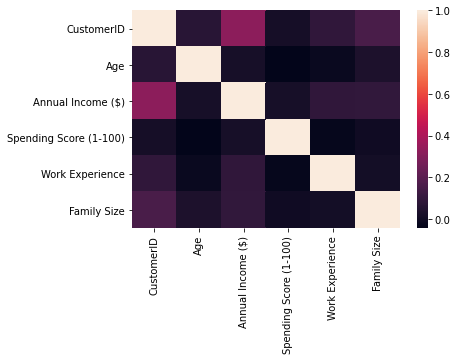

In [25]:
corr = df.corr()
sns.heatmap(corr)

In [28]:
from sklearn.preprocessing import StandardScaler
X = df.select_dtypes(include=['number'])
principal_df = pd.DataFrame(PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X)), columns=['PC1', 'PC2'])
principal_df.head(10)

,PC1,PC2
0,2.699952,-0.015429
1,2.439747,1.149905
2,2.357326,-0.421072
3,2.496205,1.073164
4,1.888395,-0.315369
5,2.513467,1.069742
6,2.621686,-1.097910
7,1.892399,1.531606
8,1.665765,-1.686993
9,1.504608,0.799674


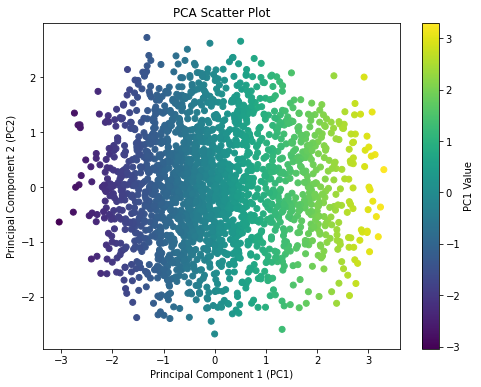

In [34]:
plt.figure(figsize=(8, 6))  
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['PC1'], cmap='viridis')  
plt.colorbar(label='PC1 Value')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Scatter Plot')
plt.show()